In [1]:
import os
import glob
import torch
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import dataset_creation
import dataset


In [2]:
train_images = glob.glob(os.path.join(dataset_creation.TRAIN_DIR, '*.jpg'))
train_labels = [x.split('\\')[-1].split('.')[0] for x in train_images]

test_images = glob.glob(os.path.join(dataset_creation.VAL_DIR, '*.jpg'))
test_labels = [x.split('\\')[-1].split('.')[0] for x in test_images]

# Fit LabelEncoder on both train and test labels to include all possible characters
le = preprocessing.LabelEncoder()
le.fit(train_labels + test_labels)
train_labels_enc = le.transform(train_labels)
test_labels_enc = le.transform(test_labels)

print(f"Number of classes: {len(le.classes_)}")

train_dataset = dataset.ClassificationDataset(
    image_paths=train_images,
    labels=train_labels_enc
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)


Number of classes: 98771


In [5]:
sample= train_dataset[0]["images"].numpy()

In [6]:
sample.shape

(3, 40, 150)

In [7]:
transposed_img=np.transpose(sample, (1, 2, 0))
transposed_img.shape

(40, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


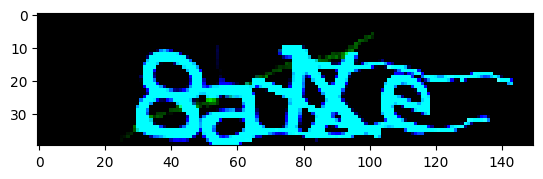

In [8]:
import matplotlib.pyplot as plt
plt.imshow(transposed_img)